# Mushroom Classification Project.

In this project we, have to predict that if the mushroom is edible or if it is poisnous. We have 22 features and 1 target variable named as 'class'. Depending on the data, we will train our model to predict the class to which the mushroom belongs.

In [177]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [178]:
ds = pd.read_csv('mushroom.csv') # reading the dataset
ds

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# Null values in 'stalk-root' column

In the column 'stalk-root' of the dataset, there are 2480 missing values which are replaced with '?' sign. So, we replace these values with the most frequent values or mode for that column such that no missing values are present in ther dataset.

In [179]:
loc = np.where(ds['stalk-root'] == '?') # finding the location where null values are present
np.shape(loc) # total number of nul values.

(1, 2480)

In [180]:
ds['stalk-root'].replace('?', np.nan, inplace = True) # replacing the '?' values with NaN values.

In [181]:
ds['stalk-root'].isnull().sum()

2480

As we can see that the '?' values have been replaced with the NaN values in the stalk-root column. We can now replace these null values with the mode of the column using simple imputer.

In [182]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
ds['stalk-root'] = si.fit_transform(ds['stalk-root'].values.reshape(-1,1))
ds['stalk-root'].isnull().sum() # checking for the null values again.

0

# Encoding the Categorical Values

Now checking all the unique values for each feature in the dataset.

In [183]:
clist = ds.columns.values
for i in range(0, len(clist)):
    print(f" {i + 1} The unique values in feature {clist[i]} are {ds[clist[i]].unique()}") 
# Here we have all the unique values in every feature of dataset.

 1 The unique values in feature class are ['p' 'e']
 2 The unique values in feature cap-shape are ['x' 'b' 's' 'f' 'k' 'c']
 3 The unique values in feature cap-surface are ['s' 'y' 'f' 'g']
 4 The unique values in feature cap-color are ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
 5 The unique values in feature bruises are ['t' 'f']
 6 The unique values in feature odor are ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
 7 The unique values in feature gill-attachment are ['f' 'a']
 8 The unique values in feature gill-spacing are ['c' 'w']
 9 The unique values in feature gill-size are ['n' 'b']
 10 The unique values in feature gill-color are ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
 11 The unique values in feature stalk-shape are ['e' 't']
 12 The unique values in feature stalk-root are ['e' 'c' 'b' 'r']
 13 The unique values in feature stalk-surface-above-ring are ['s' 'f' 'k' 'y']
 14 The unique values in feature stalk-surface-below-ring are ['s' 'f' 'y' 'k']
 15 The unique values in feat

Now that we have checked all the null values and unique values of the features, We now convert the categorical data into the numeric data using Label Encoder, so that the model can learn and predict the target. 

In [184]:
from sklearn.preprocessing import LabelEncoder

In [185]:
# Encoding the categorical values to numerical values.
le = LabelEncoder()
for i in range(len(clist)):
    ds[clist[i]] = le.fit_transform(ds[clist[i]])
    print(f" {i + 1} The unique values in feature {clist[i]} are {ds[clist[i]].unique()}")

 1 The unique values in feature class are [1 0]
 2 The unique values in feature cap-shape are [5 0 4 2 3 1]
 3 The unique values in feature cap-surface are [2 3 0 1]
 4 The unique values in feature cap-color are [4 9 8 3 2 5 0 7 1 6]
 5 The unique values in feature bruises are [1 0]
 6 The unique values in feature odor are [6 0 3 5 2 1 8 7 4]
 7 The unique values in feature gill-attachment are [1 0]
 8 The unique values in feature gill-spacing are [0 1]
 9 The unique values in feature gill-size are [1 0]
 10 The unique values in feature gill-color are [ 4  5  2  7 10  3  9  1  0  8 11  6]
 11 The unique values in feature stalk-shape are [0 1]
 12 The unique values in feature stalk-root are [2 1 0 3]
 13 The unique values in feature stalk-surface-above-ring are [2 0 1 3]
 14 The unique values in feature stalk-surface-below-ring are [2 0 3 1]
 15 The unique values in feature stalk-color-above-ring are [7 3 6 4 0 2 5 1 8]
 16 The unique values in feature stalk-color-below-ring are [7 6 3 

Now we see that all the values have been encoded to give us the int datatype such that we can proceed with the learning.

# EDA

As we have got the dataset, we will now check that the data is balanced or inbalanced.

In [186]:
import plotly.graph_objects as go 

In [187]:
x = ds

In [188]:
x0 = x[x['class'] > 0] # Values from the class which are only 1 i.e Poisonous
x1 = x[x['class'] == 0] # Values from the class which are only 0 i.e Edible

In [189]:
fig = go.Figure()
fig.add_traces(go.Histogram(x = x0['class'], name='Poisonous', xbins = dict(size=0.5),
                            marker_color='darkred', opacity=0.75))
fig.add_traces(go.Histogram(x = x1['class'], name='Edible', xbins = dict(size=0.5),
                            marker_color='forestgreen', opacity=0.75))
fig.update_layout(title_text="Mushroom's Class", xaxis_title_text='Value', yaxis_title_text='Count')
fig.show()

From the above plot, it is clear that the the data is balanced. Poisnous class of mushrooms have 3916 values and Edible class has values 4208. So the sampling of the data is not required.

We now check the variance of all the features of the dataset to check if there are any columns with low variance.

# Checking for features with constant values.

In [190]:
ds.var()

class                        0.249708
cap-shape                    2.573872
cap-surface                  1.512586
cap-color                    6.481204
bruises                      0.242900
odor                         4.425676
gill-attachment              0.025184
gill-spacing                 0.135432
gill-size                    0.213624
gill-color                  12.534142
stalk-shape                  0.245513
stalk-root                   0.660396
stalk-surface-above-ring     0.386212
stalk-surface-below-ring     0.456941
stalk-color-above-ring       3.616643
stalk-color-below-ring       3.637761
veil-type                    0.000000
veil-color                   0.058888
ring-number                  0.073476
ring-type                    3.246022
spore-print-color            5.677084
population                   1.567709
habitat                      2.958316
dtype: float64

From the above values, we see that variance of column 'veil-type' is 0. So, all the values in this column are same. So this column can be dropped from the dataset as it will not help in the learning of the model. 

In [191]:
ds.drop(['veil-type'], axis = 1, inplace = True) # removing from the dataset.

In [192]:
ds.shape

(8124, 22)

# Correlation - Features and Class

We check the correlation of all the columns with the target feature.

<AxesSubplot:>

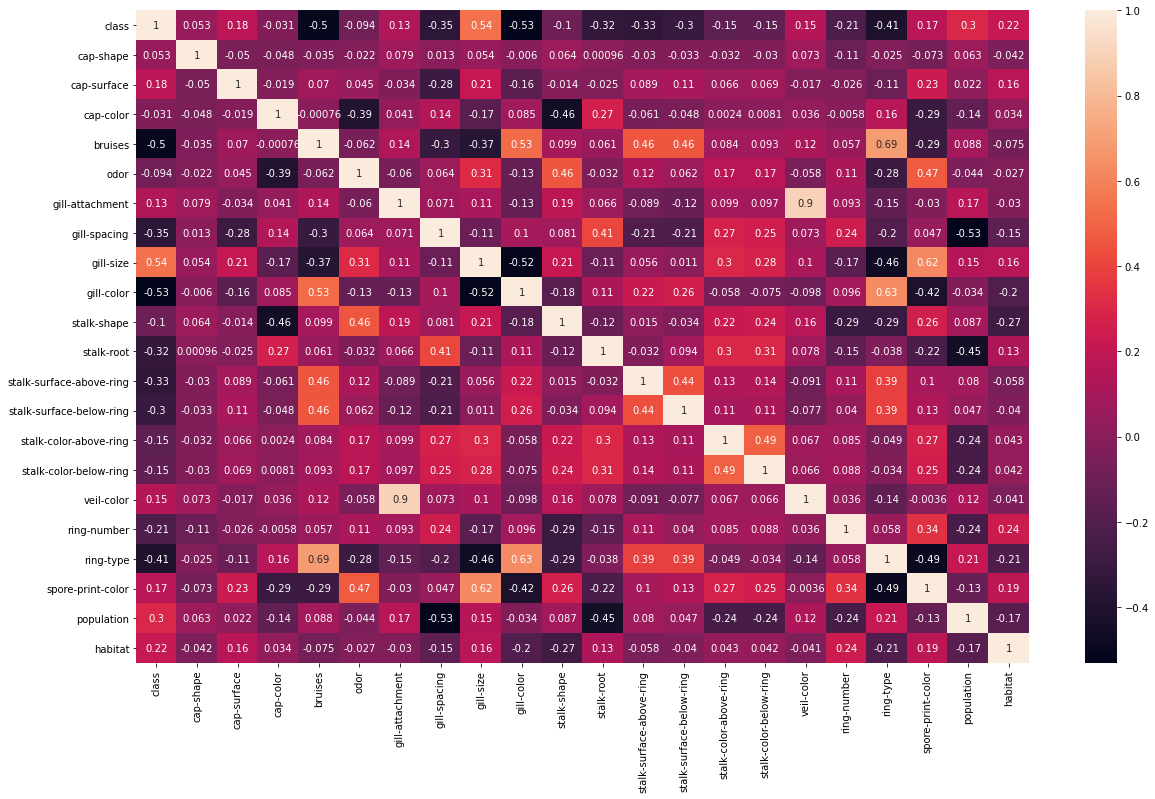

In [193]:
cor_mat = ds.corr()
cor_mat
plt.figure(figsize = (20, 12))
sb.heatmap(cor_mat, annot = True)

From the above correlation matrix, we can check the between class and all the other features of the dataset.

Since the values were all categorical, so we donot check for the outliers and skewness of the features.

We can now proceed with spliting the data and fitting it into various models to check its performance and selecting the best model for the dataset.

# Model fitting and tuning

In [194]:
ds.describe() # Descriptive Statistics though not very usefull in case of classification dataset.

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [195]:
x = ds.loc[:, 'cap-shape':'habitat']
y = ds.loc[:, 'class']
print(x.shape, y.shape)

(8124, 21) (8124,)


In [196]:
# Importing all the important models, meathods and classes.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [197]:
from sklearn.model_selection import train_test_split

we now check the best random state possible for the model fitting and then use it for splitting

In [198]:
max_accuracy = 0
best_rs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > max_accuracy: # after each iteration, acc is replace by the best possible accuracy
        max_accuracy = acc
        best_rs = i
print(f"Best accuracy is {max_accuracy} and best random state is {best_rs}")

Best accuracy is 0.9684167350287121 and best random state is 54


As from above, we see that the best possible random state will be 54 so we use it for the splitting of the model.

# Splitting the data into training and testing

In [199]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 54)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(5686, 21) (2438, 21) (5686,) (2438,)


# Finding the best Model

Now, we fit the training and testin gdata into different classification models and check their respective accuracies. If the accuracy is low, it can mean that the model is underfitting, or if the accuracy is very high then it means that the model is overfitting. We will check the underfitting and overfitting of the model using the cross validation

In [200]:
rfc = RandomForestClassifier(n_estimators = 100) # making the instance of class
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print("Accuracy Score of RFC model is", accuracy_score(y_test, pred_rfc))

Accuracy Score of RFC model is 1.0


In [201]:
dtc = DecisionTreeClassifier() # making the instance of DecisionTreeClassifier class
dtc.fit(x_train, y_train) # fitting the model
pred_dtc = dtc.predict(x_test) # predicting the values
print("Accuracy Score of DTC model is", accuracy_score(y_test, pred_dtc))

Accuracy Score of DTC model is 1.0


In [202]:
nb = MultinomialNB() # making the Multinomial Naive Bayes class
nb.fit(x_train, y_train) # fitting the model
pred_nb = nb.predict(x_test) # predicting the values
print("Accuracy Score of MNB model is", accuracy_score(y_test, pred_nb))

Accuracy Score of MNB model is 0.8388022969647252


In [203]:
knc = KNeighborsClassifier(n_neighbors = 5) # making the K-Nearest Neighbor Classifier class. By default value of nn is 5
knc.fit(x_train, y_train) # fitting the model
pred_knc = knc.predict(x_test) # predicting the values
print("Accuracy Score of KNN model is", accuracy_score(y_test, pred_knc))

Accuracy Score of KNN model is 0.9995898277276456


In [204]:
svc = SVC(kernel = 'rbf') # making the Support Vector Machine Classifier class. By default, the kernel is set to RBF.
svc.fit(x_train, y_train) # fitting the model
pred_svc = svc.predict(x_test) # predicting the values
print("Accuracy Score of svc model is", accuracy_score(y_test, pred_svc))

Accuracy Score of svc model is 0.9901558654634947


In [205]:
ada= AdaBoostClassifier()
ada.fit(x_train, y_train) # fitting the model
pred_ada = ada.predict(x_test) # predicting the values
print("Accuracy Score of ADA model is", accuracy_score(y_test, pred_ada))

Accuracy Score of ADA model is 1.0


In [206]:
lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test) # predicting the values
print("Accuracy Score of LG model is", accuracy_score(y_test, pred_lg))

Accuracy Score of LG model is 0.9684167350287121


# Cross Validating - Checking Underfiting or Overfiting

Now we cross validate different models and check the difference between the accuracy score to find out that which model is actually giving the best result.

In [207]:
from sklearn.model_selection import cross_val_score
rfc_scores = cross_val_score(rfc, x, y, cv = 5) # cross validating the model
print(rfc_scores) # accuracy scores of each cross validation cycle
print(rfc_scores.mean(), rfc_scores.std()) # mean and standard deviation of accuracy score.

[0.84246154 1.         1.         1.         0.62315271]
0.8931228495642289 0.14813414251991924


In [208]:
dtc_scores = cross_val_score(dtc, x, y, cv = 5) # cross validating the model
print(dtc_scores) # accuracy scores of each cross validation cycle
print(dtc_scores.mean(), dtc_scores.std()) # mean and standard deviation of accuracy score.

[0.84246154 1.         1.         1.         0.65517241]
0.8995267904509283 0.13656507744494692


In [209]:
nb_scores = cross_val_score(nb, x, y, cv = 5) # cross validating the model
print(nb_scores) # accuracy scores of each cross validation cycle
print(nb_scores.mean(), nb_scores.std()) # mean and standard deviation of accuracy score.

[0.62215385 0.68307692 0.72984615 0.99753846 0.68780788]
0.7440846532777567 0.1312994346286514


In [210]:
knc_scores = cross_val_score(knc, x, y, cv = 5) # cross validating the model
print(knc_scores) # accuracy scores of each cross validation cycle
print(knc_scores.mean(), knc_scores.std()) # mean and standard deviation of accuracy score.

[0.84430769 0.99753846 0.92984615 1.         0.64100985]
0.8825404319818114 0.13346002516609565


In [211]:
svc_scores = cross_val_score(svc, x, y, cv = 5) # cross validating the model
print(svc_scores) # accuracy scores of each cross validation cycle
print(svc_scores.mean(), svc_scores.std()) # mean and standard deviation of accuracy score.

[0.82276923 0.99692308 0.90338462 1.         0.51169951]
0.8469552860932172 0.18004371378755302


In [212]:
ada_scores = cross_val_score(ada, x, y, cv = 5) # cross validating the model
print(ada_scores) # accuracy scores of each cross validation cycle
print(ada_scores.mean(), ada_scores.std()) # mean and standard deviation of accuracy score.

[0.84246154 1.         1.         1.         0.74384236]
0.9172607805987116 0.10602472252902088


In [213]:
lg_scores = cross_val_score(lg, x, y, cv = 5) # cross validating the model
print(lg_scores) # accuracy scores of each cross validation cycle
print(lg_scores.mean(), lg_scores.std()) # mean and standard deviation of accuracy score.

[0.76615385 0.98830769 0.87569231 0.99876923 0.78940887]
0.8836663887836302 0.09690792608931943


The least difference is between accuracy score and cross validation score is for Decision Tree Classisfier model, so we use it for our model.

# Hyper Parameter Tuning

Now that we have selected our model as decision tree classifier, we now select the best parameters to give the best possible metrics possible.

In [215]:
from sklearn.model_selection import GridSearchCV

In [216]:
dtc = DecisionTreeClassifier()
parameters = { 'criterion' : ['gini', 'entropy'], 'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,15,16,17,18,19,20]}
gs = GridSearchCV(estimator = dtc, param_grid = parameters, scoring = 'f1', cv = 5)
gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

1.0
{'criterion': 'gini', 'max_depth': 7}


Now that we have the best possible parameters for the model. We fit the model with final parameters, and perform all the metrics on that model.

In [217]:
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 7)
dtc.fit(x_train, y_train) # fitting the model
print(dtc.score(x_train, y_train)) #calculationg that how much data have been learned
pred_dtc = dtc.predict(x_test) # predicting the values
# Now performing some metrics to test the fitted model.
print("Accuracy Score of DTC model is", accuracy_score(y_test, pred_dtc))
print("Confusion matrix for DTC Model is")
print(confusion_matrix(y_test, pred_dtc))
print("Classification Report of the DTC Model is")
print(classification_report(y_test, pred_dtc))

1.0
Accuracy Score of DTC model is 1.0
Confusion matrix for DTC Model is
[[1282    0]
 [   0 1156]]
Classification Report of the DTC Model is
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1282
           1       1.00      1.00      1.00      1156

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



As we seen that we have achieved accuracy score of 100% and to check if the model is overfitting, we check the f1-score of the model which is also 100%. 

We can now succesfully predict on any new given data for Mushrooms that they are either Edible (0) or Poisonous (1)

# Serialisation

We will save the project such that predictions can be carried out on the different types of mushrooms and one can safely find out the class of mushrooms.

In [218]:
import joblib
joblib.dump(dtc, 'mushroom prediction model.obj')

['mushroom prediction model.obj']